In [4]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
# plt.style.use('seaborn-whitegrid')

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('00 df.csv')
train = df[df['flag']=='train']
test = df[df['flag']=='test']

In [3]:
cat_feats = ['age_bin','capital_gl_bin','education_bin','hours_per_week_bin','msr_bin','occupation_bin','race_sex_bin']

y_train = train['y']
x_train = train[['age_bin','capital_gl_bin','education_bin','hours_per_week_bin','msr_bin','occupation_bin','race_sex_bin']]
x_train = pd.get_dummies(x_train,columns=cat_feats,drop_first=True)

y_test = test['y']
x_test = test[['age_bin','capital_gl_bin','education_bin','hours_per_week_bin','msr_bin','occupation_bin','race_sex_bin']]
x_test = pd.get_dummies(x_test,columns=cat_feats,drop_first=True)

C:\Users\Deevita\anaconda3\Deevita\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\Deevita\anaconda3\Deevita\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\Deevita\anaconda3\Deevita\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


<Axes: >

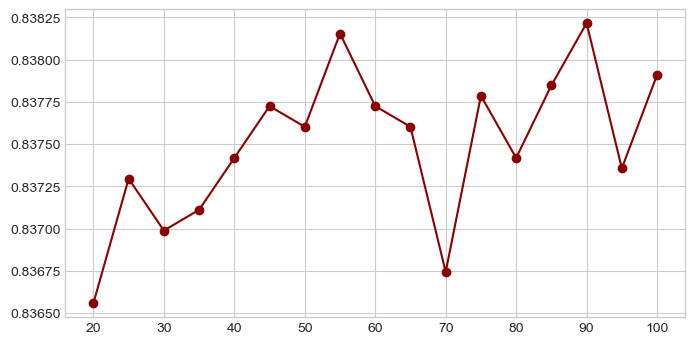

In [6]:
results = []
n_estimaor_options = [20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
for trees in n_estimaor_options:
    model = RandomForestClassifier(trees, oob_score=True, n_jobs=-1, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimaor_options).plot(color="darkred",marker="o")

<Axes: >

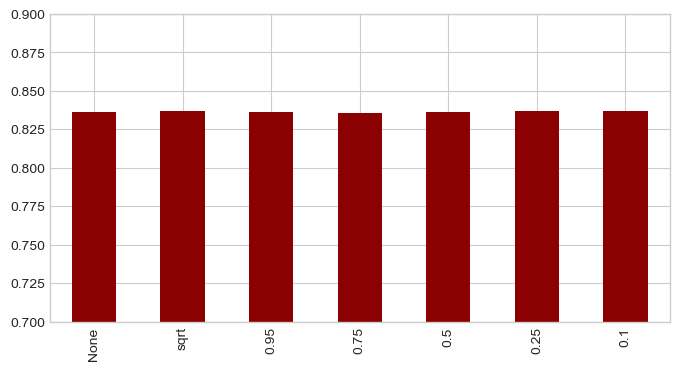

In [7]:
results = []
max_features_options = [None,'sqrt',0.95,0.75,0.5,0.25,0.10]
for trees in max_features_options:
    model = RandomForestClassifier(n_estimators=70, oob_score=True, n_jobs=-1, random_state=101, max_features = trees)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_features_options).plot(kind="bar",color="darkred",ylim=(0.7,0.9))

<Axes: >

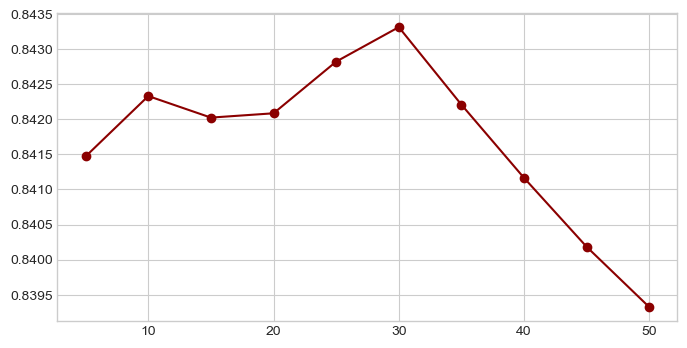

In [8]:
results = []
min_samples_leaf_options = [5,10,15,20,25,30,35,40,45,50]
for trees in min_samples_leaf_options:
    model = RandomForestClassifier(n_estimators=70, oob_score=True, n_jobs=-1, random_state=101, max_features = None, min_samples_leaf = trees)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, min_samples_leaf_options).plot(color="darkred",marker="o")

In [9]:
rfm = RandomForestClassifier(n_estimators=70, oob_score=True, n_jobs=-1, random_state=101, max_features = None, min_samples_leaf = 30)
rfm.fit(x_train, y_train)
y_pred=rfm.predict(x_test)

In [10]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
df_table = confusion_matrix(y_test,y_pred)
print(df_table)
print("Precision:", precision)
print("Recall:", recall)
print('Accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print('f1 score: ', (2*precision*recall)/(precision+recall))

[[11581   854]
 [ 1697  2149]]
Precision: 0.8352070315116209
Recall: 0.8433142927338616
Accuracy: 0.8433142927338616
f1 score:  0.8392410830790984
